Loading functions

In [1]:
%load_ext autoreload
%autoreload 2

from utils import *
from dual import *

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### airline data prep

In [2]:
data_airline = pd.read_csv('airline_data.csv').dropna()
#save_file('airline_500', data_airline)
#data_airline = load_file('airline_500')


In [3]:
data_size = len(data_airline.index)

air_X = data_airline.iloc[:, :-1]
air_y = data_airline.iloc[:, -1]

sat_encoder = LabelEncoder()
air_y = np.array(sat_encoder.fit_transform(air_y))
air_y = air_y * 2 - 1

air_X['Gender'] = sat_encoder.fit_transform(air_X.Gender.values)
air_X['Customer Type'] = sat_encoder.fit_transform(air_X['Customer Type'].values)
air_X['Type of Travel'] = sat_encoder.fit_transform(air_X['Type of Travel'].values)
air_X['Class'] = sat_encoder.fit_transform(air_X['Class'].values)

air_X = air_X.drop(labels=["Unnamed: 0"], axis=1)
air_X = air_X.drop(labels=["id"], axis=1)

air_X = air_X[['Flight Distance',
       'Arrival Delay in Minutes']]

scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(air_X)
air_X = np.array(scaler.transform(air_X))

#air_X = air_X[:,0:12]

## use stock SVM

In [4]:
from sklearn import svm
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(air_X, air_y, train_size=500, random_state=42)

model = svm.SVC(kernel='linear', C=1, probability=False)
model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [5]:
X_train.shape

(500, 2)

In [6]:
w = model.coef_[0]
b = model.intercept_
msize = 1 / np.sqrt(np.sum(w ** 2))

In [7]:
y_pred = model.predict(X_test) 

In [8]:
Risk = np.mean((1-(y_pred * y_test)) / 2)
Risk

0.3465930675184321

In [9]:
from utils import _margin_loss

In [10]:
mlosses = _margin_loss(w, b, msize, X_test, y_test)

In [11]:
np.mean(mlosses)

0.5039527324837543

In [12]:
MARGINS = np.linspace(0.0, 3.0, 100)

In [13]:
mmlosses = []
for mar in MARGINS:
    mmlosses.append(np.mean(_margin_loss(w, b, mar, X_test, y_test)))

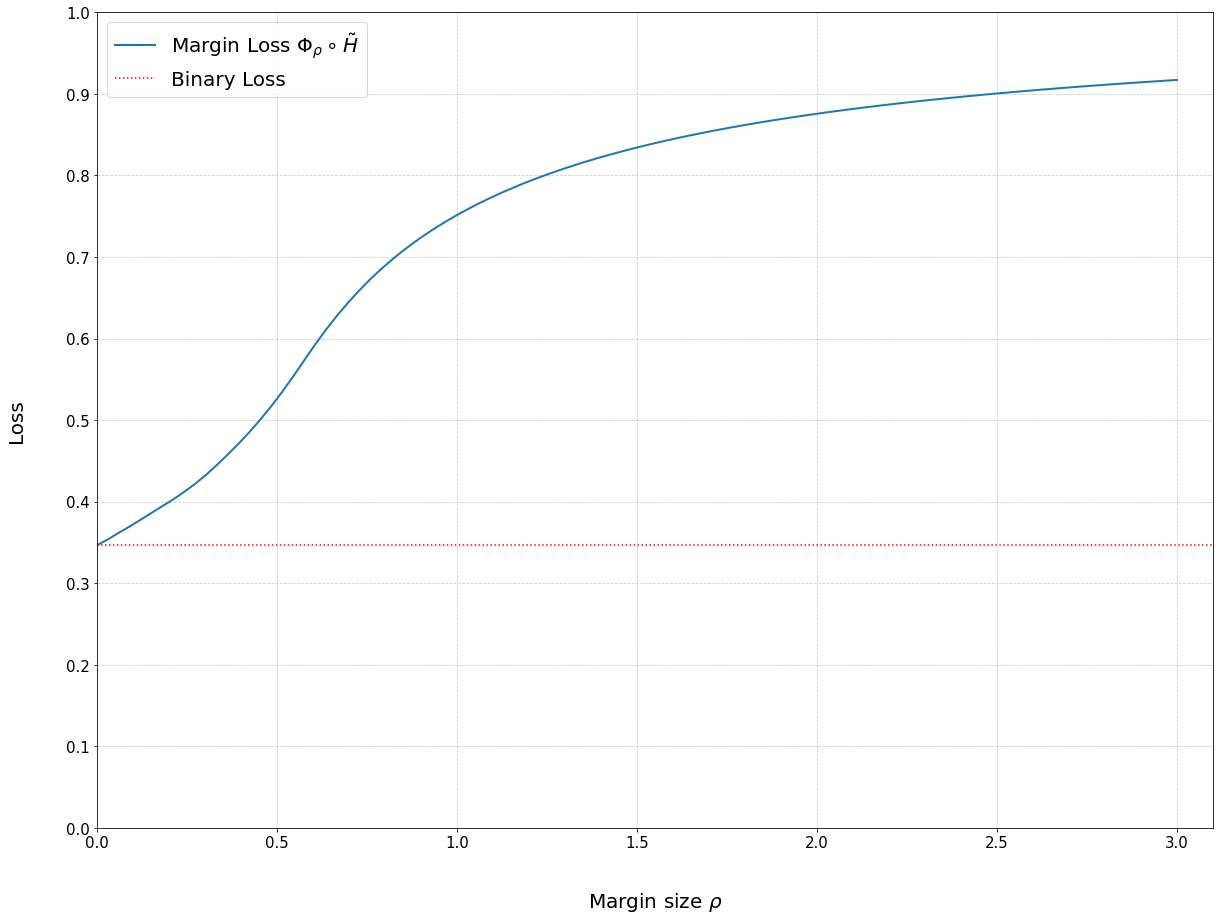

In [15]:
import matplotlib.cm as cm
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

fig, ax = plt.subplots(figsize=[20,15])

plt.plot(MARGINS, mmlosses, lw=2, label=r'Margin Loss $\Phi_\rho \circ \tilde{H}$')
plt.axhline(y=mmlosses[0], color='r', linestyle=':', label="Binary Loss")

plt.ylim(0,1)
plt.xlim(0,3.1)

ax.minorticks_on()
ax.grid(True, which='both')

ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.yaxis.set_major_locator(MultipleLocator(0.1))

ax.xaxis.set_minor_locator(AutoMinorLocator(0.5))
ax.yaxis.set_minor_locator(AutoMinorLocator(0.05))

# Turn grid on for both major and minor ticks and style minor slightly
# differently.
ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':',lw=3)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=20)

plt.xlabel(r"Margin size $\rho$", fontsize=20, labelpad=40)
plt.ylabel("Loss", fontsize=20, labelpad=40)
#plt.title(r'Margin loss $(\Phi_\rho \circ \tilde{H})$ change with margin size $\rho$', fontsize=20, pad=40)

plt.savefig("images/RISK_VS_MLOSS_INPLACE.png", bbox_inches='tight')

plt.show()
